Oro transporto keleiviu pasitenkinimo/nepasitenkinimo analize

1. Ar moterys buna labiau nepasitenkinusios skrydziu negu vyrai?
2. Ar neutralia nuomone turinciu ar nepatenkintu skrydziu buna daugiau verslo kelioniu keleiviu?
3. Ar nepasitenkinimas (arba neutrali nuomone) priklauso nuo amziaus?
4. Labiausiai nepatenkinti ilgu distanciju skrydziu (virs 1200 km) keleiviai buna vyrai.
5. Ilgesnis nei 1 valandos skrydzio uzlaikymas itakoja didesni neutralia nuomone turinciu ar nepatenkintu keleiviu kieki.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
sdata = pd.read_csv('airline_passenger_satisfaction.csv')
sdata

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [62]:
sdata.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [63]:
sdata['Average score'] = round((sdata['Departure and Arrival Time Convenience'] + sdata['Ease of Online Booking'] + sdata['Check-in Service'] + sdata['Online Boarding'] + sdata['Gate Location'] + sdata['On-board Service'] + sdata['Seat Comfort'] + sdata['Leg Room Service'] + sdata['Cleanliness'] + sdata['Food and Drink'] + sdata['In-flight Service'] + sdata['In-flight Wifi Service'] + sdata['In-flight Entertainment'] + sdata['Baggage Handling'])/14, 2)
sdata

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average score
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,3.86
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,3.79
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,3.93
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,3.79
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,1,4,4,4,5,4,4,4,Neutral or Dissatisfied,3.79
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,2,5,2,2,4,3,2,5,Neutral or Dissatisfied,3.57
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,4,3,3,4,2,3,5,Neutral or Dissatisfied,3.14
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,5,3,3,4,5,3,5,Satisfied,3.71


1. Ar moterys buna labiau nepasitenkinusios skrydziu negu vyrai? Hipoteze pasitvirtino. Moterys keleives dazniau issako neutralia pozicija ar nepasitenkinima skrydziais negu vyrai keleiviai. 57,10% moteru keleiviu (is 65899 dalyvavusiu apklausoje moteru) issake nepasitenkinima (arba neutralia pozicija) skrydziais ir antzeminiu aptarnavimu, o vyru keleiviu procentas sudaro 55,99% (is 63981 dalyvavusiu apklausoje vyru).

In [64]:
# Kiek is viso pasisakiusiu pagal lyti

sdata.groupby(['Gender']).count()['ID']

Gender
Female    65899
Male      63981
Name: ID, dtype: int64

In [65]:
# 37630 moteru issake neutralia nuomone ar nepasitenkinima skrydziais

selected_f = sdata.loc[ (sdata['Gender'] == 'Female') & (sdata['Satisfaction'] == 'Neutral or Dissatisfied')]
selected_f

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average score
10,11,Female,28,First-time,Business,Business,821,0,5.0,1,...,2,5,2,2,4,1,2,3,Neutral or Dissatisfied,2.29
11,12,Female,27,First-time,Business,Business,421,20,21.0,2,...,2,5,1,1,3,1,1,4,Neutral or Dissatisfied,2.21
16,17,Female,48,Returning,Personal,Economy,821,0,0.0,3,...,1,2,2,1,5,2,5,5,Neutral or Dissatisfied,3.29
17,18,Female,61,Returning,Personal,Economy,821,0,0.0,5,...,5,2,1,4,5,2,5,5,Neutral or Dissatisfied,3.43
18,19,Female,11,Returning,Personal,Economy,853,0,0.0,5,...,5,2,5,5,5,3,5,4,Neutral or Dissatisfied,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129870,129871,Female,23,First-time,Business,Business,337,46,58.0,2,...,5,1,5,5,4,2,5,4,Neutral or Dissatisfied,3.21
129872,129873,Female,44,Returning,Personal,Economy Plus,308,0,22.0,4,...,4,3,5,5,3,3,3,3,Neutral or Dissatisfied,3.36
129873,129874,Female,28,Returning,Personal,Economy Plus,337,0,0.0,2,...,3,5,3,3,4,4,3,3,Neutral or Dissatisfied,3.36
129874,129875,Female,55,Returning,Personal,Economy Plus,308,0,0.0,4,...,3,3,4,2,4,3,4,4,Neutral or Dissatisfied,3.57


In [66]:

selected_f['ID'].count()

37630

In [67]:
# Nors kriteriju ivertinimo vidurkis galejo buti gana aukstas. Cia - maksimalus nepatenkintos moters keleives visu kriteriju vidurkis
selected_f['Average score'].max()

4.64

In [68]:
# Konkreti tos keleives eilute su informacija
selected_f.loc[selected_f['Average score'].idxmax()]

ID                                                          57280
Gender                                                     Female
Age                                                            57
Customer Type                                           Returning
Type of Travel                                           Personal
Class                                                     Economy
Flight Distance                                               628
Departure Delay                                                 0
Arrival Delay                                                 0.0
Departure and Arrival Time Convenience                          5
Ease of Online Booking                                          4
Check-in Service                                                5
Online Boarding                                                 5
Gate Location                                                   5
On-board Service                                                5
Seat Comfo

In [69]:
# 35822 vyru issake neutralia nuomone ar nepasitenkinima skrydziais
selected_m = sdata.loc[ (sdata['Gender'] == 'Male') & (sdata['Satisfaction'] == 'Neutral or Dissatisfied')]
selected_m

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average score
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,3.86
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,3,4,3,3,4,4,4,4,Neutral or Dissatisfied,2.93
12,13,Male,24,First-time,Business,Economy,453,16,30.0,2,...,5,4,5,5,4,2,5,4,Neutral or Dissatisfied,3.43
13,14,Male,9,Returning,Personal,Business,853,68,76.0,5,...,5,3,5,5,5,1,5,4,Neutral or Dissatisfied,3.64
14,15,Male,52,Returning,Personal,Economy,853,0,0.0,4,...,2,3,2,2,5,2,2,5,Neutral or Dissatisfied,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129867,129868,Male,47,Returning,Business,Economy Plus,447,0,0.0,4,...,4,5,4,4,4,3,4,3,Neutral or Dissatisfied,3.50
129869,129870,Male,20,First-time,Business,Economy,447,8,0.0,2,...,4,4,4,4,2,2,4,2,Neutral or Dissatisfied,2.64
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,1,4,4,4,5,4,4,4,Neutral or Dissatisfied,3.79
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,2,5,2,2,4,3,2,5,Neutral or Dissatisfied,3.57


In [70]:

selected_m['ID'].count()

35822

In [71]:
# Cia - maksimalus neutralios nuomones ar nepatenkinto vyro keleivio visu kriteriju vidurkis.
selected_m['Average score'].max()

4.64

In [72]:
# Konkreti to keleivio eilute su informacija
selected_m.loc[selected_m['Average score'].idxmax()]

ID                                                          74645
Gender                                                       Male
Age                                                            35
Customer Type                                           Returning
Type of Travel                                           Personal
Class                                                     Economy
Flight Distance                                              1431
Departure Delay                                               107
Arrival Delay                                                97.0
Departure and Arrival Time Convenience                          5
Ease of Online Booking                                          4
Check-in Service                                                4
Online Boarding                                                 4
Gate Location                                                   5
On-board Service                                                5
Seat Comfo

2. Ar neutralia nuomone turinciu ar nepatenkintu skrydziu buna daugiau verslo kelioniu keleiviu? Hipoteze nepasitvirtino. Privaciu kelioniu keleiviai dazniau nei verslo kelioniu keleiviai issako neutralia nuomone ar nepasitenkinima skrydziu ir antzeminiu aptarnavimu.

In [73]:
sdata.groupby(['Type of Travel', 'Satisfaction']).count()['ID']

Type of Travel  Satisfaction           
Business        Neutral or Dissatisfied    37337
                Satisfied                  52356
Personal        Neutral or Dissatisfied    36115
                Satisfied                   4072
Name: ID, dtype: int64

In [74]:
#Isvedame nepatenkintu verslo kelioniu keleiviu procenta

round(37337*100/(37337+52356), 2)

41.63

In [75]:
#Isvedame nepatenkintu privaciu kelioniu keleiviu procenta

round(36115*100/(36115+4072), 2)

89.87

3. Ar nepasitenkinimas (arba neutrali nuomone) priklauso nuo amziaus? Keleiviai, kuriems yra maziau nei 50 metu, dazniau buna nepatenkinti skrydziais ir antzeminiu aptarnavimu (arba turi neutralia nuomone). Hipoteze pasitvirtino. 57,95% jaunesniu nei 50 metu keleiviu issake nepasitenkinima (arba neutralia pozicija) skrydziais ir antzeminiu aptarnavimu, o vyresniu nei 50 metu keleiviu nepasitenkinimo procentas sudaro 52,93%.

In [76]:
# Filtruojame keleivius, kuriems iki 50 metu
under_50 = sdata.loc[ (sdata['Age'] < 50) ]
under_50

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average score
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,3.86
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,3.79
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,3.93
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,3.50
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,3,3,4,4,4,4,Satisfied,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,129874,Female,28,Returning,Personal,Economy Plus,337,0,0.0,2,...,3,5,3,3,4,4,3,3,Neutral or Dissatisfied,3.36
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,1,4,4,4,5,4,4,4,Neutral or Dissatisfied,3.79
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,2,5,2,2,4,3,2,5,Neutral or Dissatisfied,3.57
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,4,3,3,4,2,3,5,Neutral or Dissatisfied,3.14


In [77]:
# Jaunesniu nei 50 metu keleiviu pasiskirstymas pagal pasitenkinimo/nepasitenkinimo kriterijus
under_50.groupby( ['Satisfaction'] ).count()['ID']

Satisfaction
Neutral or Dissatisfied    54301
Satisfied                  39398
Name: ID, dtype: int64

In [78]:
#Is visu jaunesniu nei 50 metu respondentu (93699 keleiviu) nepasitenkinima arba neutralia pozicija issake 54301 keleiviu, kas yra 57,95%.

round(54301*100/93699, 2)

57.95

In [79]:
# Filtruojam keleivius, kuriems virs 50 metu
above_50 = sdata.loc[ (sdata['Age'] >= 50) ]
above_50

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average score
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,3.79
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,4,4,4,4,3,4,3,3,Satisfied,3.57
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,3,4,3,3,4,4,4,4,Neutral or Dissatisfied,2.93
14,15,Male,52,Returning,Personal,Economy,853,0,0.0,4,...,2,3,2,2,5,2,2,5,Neutral or Dissatisfied,2.93
15,16,Male,70,Returning,Personal,Economy,821,0,0.0,5,...,5,2,5,5,5,2,5,4,Neutral or Dissatisfied,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129854,129855,Female,56,Returning,Business,Business,1972,0,0.0,0,...,5,3,5,3,3,0,3,3,Satisfied,2.86
129862,129863,Male,51,Returning,Business,Business,308,0,0.0,4,...,5,5,4,3,5,4,5,5,Satisfied,4.43
129865,129866,Male,64,Returning,Business,Economy Plus,337,27,18.0,3,...,2,2,2,2,3,2,2,3,Neutral or Dissatisfied,2.29
129874,129875,Female,55,Returning,Personal,Economy Plus,308,0,0.0,4,...,3,3,4,2,4,3,4,4,Neutral or Dissatisfied,3.57


In [80]:
above_50.groupby( ['Satisfaction']).count()['ID']

Satisfaction
Neutral or Dissatisfied    19151
Satisfied                  17030
Name: ID, dtype: int64

In [81]:
#Is visu vyresniu nei 50 metu respondentu (36181 keleiviu) nepasitenkinima arba neutralia pozicija issake 19151 keleiviu, kas yra 52,93%.

round(19151*100/36181, 2)

52.93

4. Labiausiai nepatenkinti ilgu distanciju skrydziu (virs 1200 km) keleiviai buna vyrai. Hipoteze nepasitvirtino.

In [82]:
selected = sdata.loc[ (sdata['Satisfaction'] == 'Neutral or Dissatisfied') & (sdata['Flight Distance'] >= 1200) ]
selected

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average score
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,3,4,3,3,4,4,4,4,Neutral or Dissatisfied,2.93
54,55,Male,36,Returning,Business,Business,3655,40,71.0,1,...,3,3,2,1,3,1,3,1,Neutral or Dissatisfied,2.14
62,63,Female,37,Returning,Business,Business,2423,0,8.0,4,...,4,2,4,3,2,3,2,3,Neutral or Dissatisfied,3.00
69,70,Female,49,Returning,Business,Business,3213,68,59.0,3,...,4,1,3,3,1,4,1,4,Neutral or Dissatisfied,2.57
71,72,Male,53,Returning,Business,Business,3201,7,24.0,2,...,3,1,1,3,2,3,2,3,Neutral or Dissatisfied,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129695,129696,Male,18,Returning,Business,Business,1708,0,22.0,4,...,2,1,2,2,4,2,2,4,Neutral or Dissatisfied,2.64
129705,129706,Female,30,Returning,Business,Business,3676,38,33.0,2,...,1,1,1,1,4,1,1,3,Neutral or Dissatisfied,2.07
129728,129729,Female,20,Returning,Business,Business,3295,160,173.0,3,...,3,3,3,3,1,3,1,3,Neutral or Dissatisfied,2.86
129729,129730,Female,48,Returning,Business,Business,3801,100,94.0,4,...,2,4,2,5,4,4,4,4,Neutral or Dissatisfied,3.50


In [83]:
selected.groupby(['Gender']).count()['ID']

Gender
Female    8785
Male      8394
Name: ID, dtype: int64

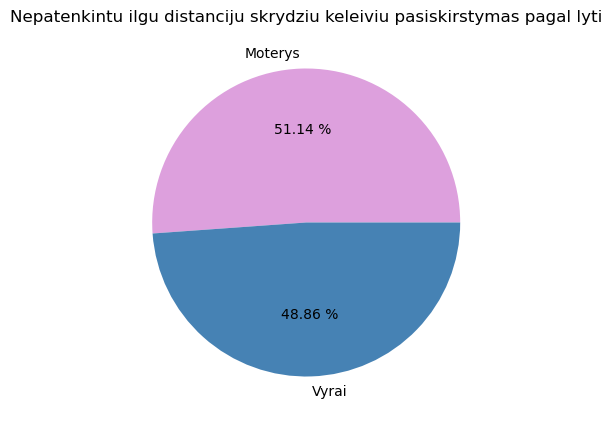

In [109]:
f = selected.loc[selected['Gender'] == 'Female'].count()[0]
m = selected.loc[selected['Gender'] == 'Male'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Moterys', 'Vyrai']
colors = ['plum', 'steelblue']

plt.pie([f, m], labels = labels, colors = colors, autopct='%.2f %%')

plt.title('Nepatenkintu ilgu distanciju skrydziu keleiviu pasiskirstymas pagal lyti')

plt.show()

5. Ilgesnis nei 1 valandos skrydzio uzlaikymas itakoja didesni neutralia nuomone turinciu ar nepatenkintu keleiviu kieki. Hipoteze nepasitvirtino. Tiketina, kad esant ilgesniam skrydzio uzlaikymui keleiviai gauna daugiau demesio ir kokybisku paslaugu, o kartais ir pinigine kompensacija, kas tiesiogiai itakoja keleiviu nuomone apie aviakompanija ir skrydi.

In [106]:
delay_big = sdata.loc[ (sdata['Departure Delay'] >= 60) & (sdata['Satisfaction'] == 'Neutral or Dissatisfied')]
delay_big.reset_index(drop=True, inplace=True)
delay_big

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average score
0,14,Male,9,Returning,Personal,Business,853,68,76.0,5,...,5,3,5,5,5,1,5,4,Neutral or Dissatisfied,3.64
1,62,Male,31,Returning,Business,Economy,173,151,186.0,5,...,2,3,2,2,3,2,1,4,Neutral or Dissatisfied,3.00
2,70,Female,49,Returning,Business,Business,3213,68,59.0,3,...,4,1,3,3,1,4,1,4,Neutral or Dissatisfied,2.57
3,77,Female,72,First-time,Business,Economy,67,324,296.0,3,...,2,4,2,3,2,3,3,3,Neutral or Dissatisfied,2.86
4,83,Male,58,Returning,Personal,Economy,215,254,254.0,2,...,4,3,4,2,3,2,3,4,Neutral or Dissatisfied,3.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,129815,Female,66,Returning,Personal,Economy,337,132,140.0,3,...,5,3,5,3,4,3,1,1,Neutral or Dissatisfied,3.21
5866,129817,Male,47,Returning,Personal,Economy,337,77,79.0,5,...,2,2,2,2,4,4,2,5,Neutral or Dissatisfied,3.21
5867,129837,Male,66,Returning,Personal,Economy,337,199,213.0,4,...,5,4,5,2,4,2,5,5,Neutral or Dissatisfied,3.79
5868,129848,Female,56,Returning,Personal,Economy,337,236,255.0,5,...,4,4,4,2,5,2,4,4,Neutral or Dissatisfied,3.79


In [107]:
delay_big['ID'].count()

5870

In [108]:
delay_min = sdata.loc[ (sdata['Departure Delay'] < 60) & (sdata['Satisfaction'] == 'Neutral or Dissatisfied')]
delay_min['ID'].count()

67582